Autor: Julian Peña Duarte

Proyecto: Lideres sociales

Fecha: 2021-05-27

Propósito: gráficos y hallazgos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


In [2]:
df_final=pd.read_csv('asesinatos lideres(datos)/somos_defensores_2016_2020.csv', parse_dates=['fecha'])

In [3]:
df_final.head()

,fecha,departamento,municipio,victima,organizacion,tipo de lider,presunto responsable,mes,año,dia,semestre,Tipo defensor,presumed responsible
0,2016-01-14,CASANARE,San Luis de Palenque,Mario Alexi Tarache Pérez,Junta de Acción Comunal (JAC) de la vereda Are...,Líder Comunal,Paramilitares,1,2016,14,1,Communal,Paramilitaries
1,2016-01-16,NORTE DE SANTANDER,San Calixto,Nelly Amaya Pérez,Junta de Acción Comunal del barrio Guamalito,Líder Comunal,Paramilitares,1,2016,16,1,Communal,Paramilitaries
2,2016-01-24,NARINO,Tumaco,Johan Alexis Vargas,Coordinación Nacional de Organizaciones y Comu...,Líder Afro,Paramilitares,1,2016,24,1,Afro,Paramilitaries
3,2016-01-29,HUILA,Algeciras,Robinson Ávila Ortiz,Comunidad del Bajo Quebradón de Algeciras,Líder Comunitario,Desconocidos,1,2016,29,1,Community,Unknown
4,2016-02-02,NARINO,la Unión,Senelia Rengifo Gómez,Centro Educativo Cimarronas y Sindicato Magist...,Líder Sindical,Paramilitares,2,2016,2,1,Union,Paramilitaries


Gráfica serie de tiempo de líderes asesinados por año y semestre

In [4]:
data_by_year_semester = df_final.groupby(['año', 'semestre']) # Agrupo por año y semestre

In [5]:
data_by_year_semester_count = data_by_year_semester['victima'].agg('count')

In [6]:
#Ajuste de parametros
sns.set(font_scale=1.5,style="whitegrid")
plt.rcParams["figure.figsize"] = [16.0, 8.0]

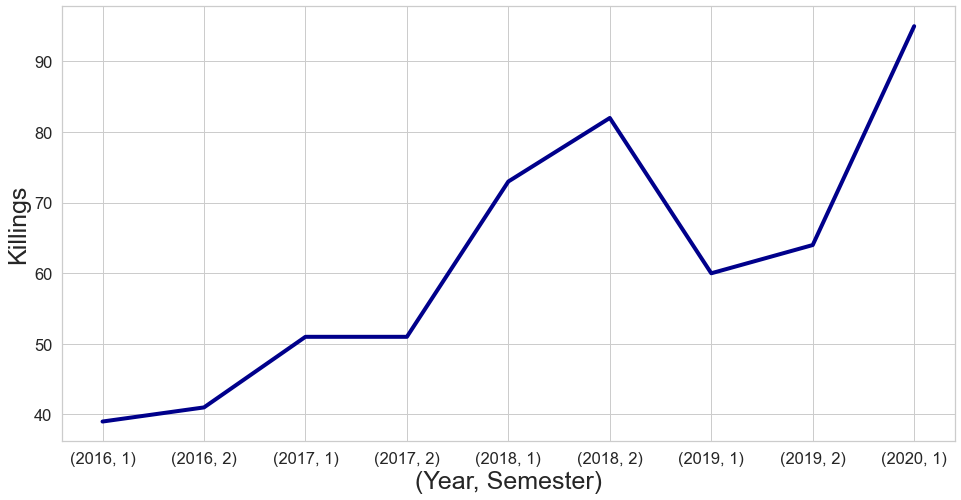

In [7]:

data_by_year_semester_count.plot(color='darkblue', linewidth=4)
plt.ylabel('Killings',fontsize = 25)
plt.xlabel("(Year, Semester)",fontsize = 25)
plt.savefig(r'graficos\Number of  killings of human rights defenders.png')

Gráfica de barras categorías de defensores más afectadas

In [8]:
df_tipo_defensor = df_final.groupby('Tipo defensor').size().reset_index(name='Count') #Agrupo por tipo de defensor

In [9]:
df_tipo_defensor.sort_values(by=['Count'], inplace=True, ascending=False)

In [10]:
df_tipo_defensor

,Tipo defensor,Count
1,Communal,170
4,Indigenous,103
3,Farmer or environmental,100
2,Community,95
0,Afro,28
7,Union,17
10,Youth or education,16
8,Victims,11
5,LGTBI,9
6,Other,9


In [11]:
df_tipo_defensor['percent']= df_tipo_defensor['Count']/560*100

In [12]:
df_tipo_defensor_percent=df_tipo_defensor.loc[:,('Tipo defensor','percent')]

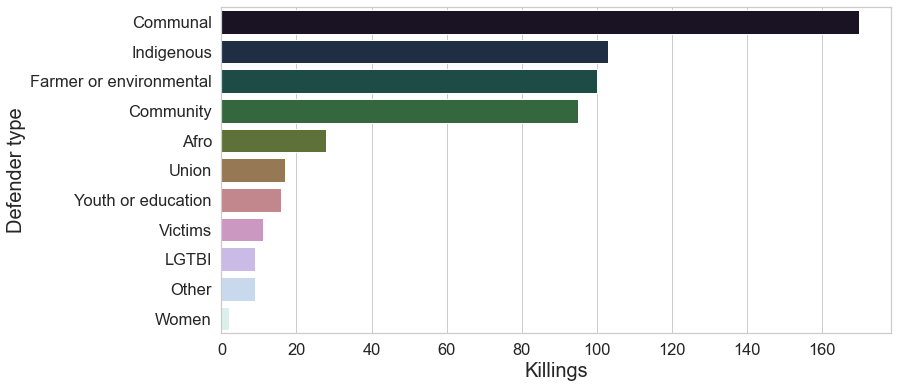

In [13]:
sns.set(font_scale=1.5,style="whitegrid")
plt.rcParams["figure.figsize"] = [12.0, 6.0]
ax=sns.barplot(x='Count', y='Tipo defensor',  data=df_tipo_defensor,palette="cubehelix")
ax.set_xlabel('Killings',fontsize = 20)
ax.set_ylabel('Defender type',fontsize = 20)
plt.savefig(r'graficos\defender_type.jpg', bbox_inches='tight');



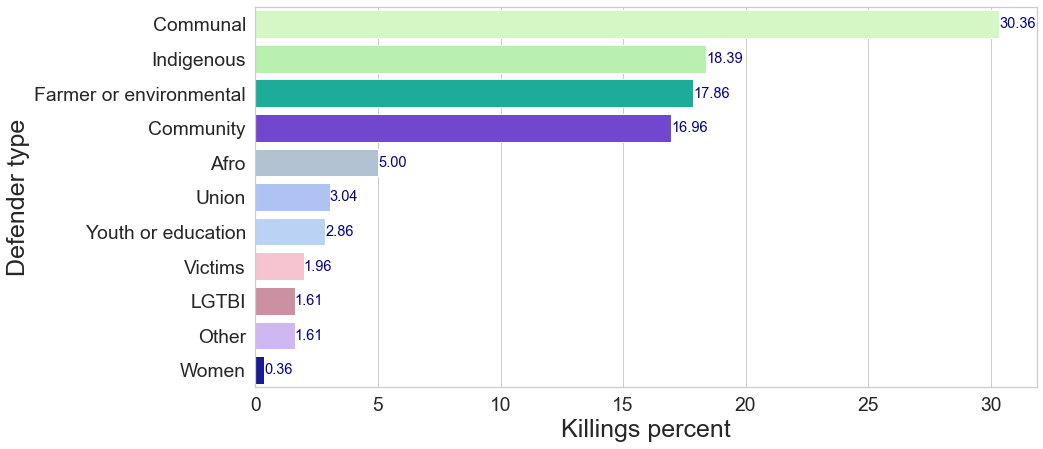

In [14]:
sns.set(font_scale=1.75,style="whitegrid")
plt.rcParams["figure.figsize"] = [14, 7]

colors=['#d1ffbd', '#b2fba5','#06c2ac','#6832e3', '#acc2d9','#a2bffe', '#b1d1fc', '#ffbacd', '#d5869d','#ceaefa',
       '#0504aa']

ax=sns.barplot(x='percent', y='Tipo defensor',  data=df_tipo_defensor_percent, palette=colors)
ax.set_xlabel('Killings percent',fontsize = 25)
ax.set_ylabel('Defender type',fontsize = 25)

for p in ax.patches:
    width = p.get_width()
    ax.text(width,      
            p.get_y() + p.get_height() / 2, 
            '{:1.2f}'.format(width), 
            ha = 'left',   
            va = 'center', color='darkblue', fontsize='x-small')  
    
plt.savefig(r'graficos\defender_type_percent.jpg', bbox_inches='tight');

Grafica de tortas presunto responsable

In [15]:
df_by_presumed_responsible = df_final.groupby('presumed responsible').size().reset_index(name='Count')

In [16]:
df_by_presumed_responsible.sort_values(by=['Count'], inplace=True, ascending=False)

In [17]:
df_by_presumed_responsible

,presumed responsible,Count
6,Unknown,360
4,Paramilitaries,97
2,FARC dissidents,49
0,ELN,25
5,Public force,22
1,EPL,4
3,Intimate partner,3


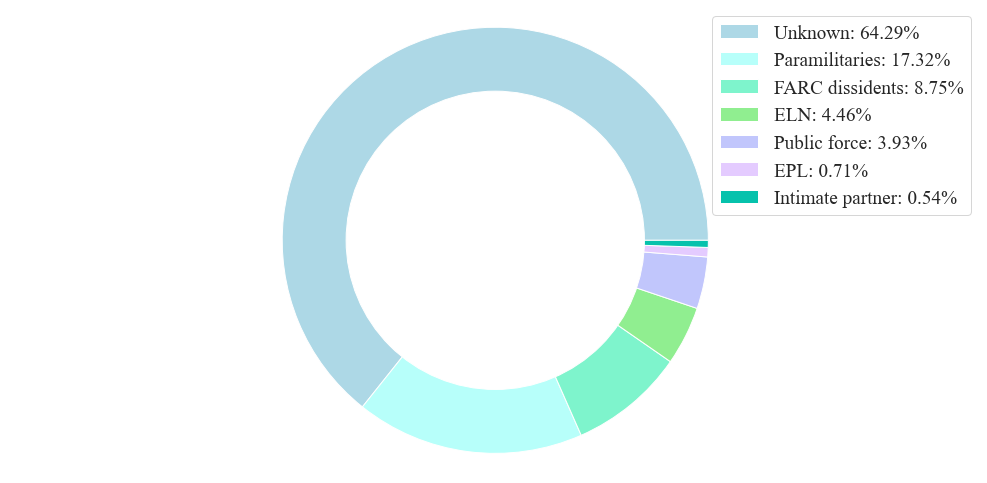

In [18]:
colors = ['lightblue','#b7fffa','#7ef4cc','lightgreen','#c1c6fc','#e4cbff','#06c2ac']
labels=['Unknown: 64.29%','Paramilitaries: 17.32%', 'FARC dissidents: 8.75%', 'ELN: 4.46%','Public force: 3.93%', 'EPL: 0.71%','Intimate partner: 0.54%']
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Times New Roman"
fig1, ax1 = plt.subplots()

ax1.pie('Count', data=df_by_presumed_responsible, pctdistance=0.85, colors=colors);

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels)
plt.savefig(r'graficos\presumed responsible1.jpg', bbox_inches='tight');


In [19]:
homicidios=pd.read_csv('homicidios(datos)/homicidios_2016_2020.csv') 

In [20]:
homicidios

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,AGRUPA EDAD PERSONA,CANTIDAD,mes,año,dia,semestre
0,AMAZONAS,LETICIA (CT),91001000.0,ARMA BLANCA / CORTOPUNZANTE,2016-01-01,MASCULINO,ADULTOS,1.0,1,2016,1,1
1,ANTIOQUIA,MEDELLÍN (CT),5001000.0,ARMA BLANCA / CORTOPUNZANTE,2016-01-01,MASCULINO,ADULTOS,1.0,1,2016,1,1
2,ANTIOQUIA,SABANALARGA,5628000.0,ARMA BLANCA / CORTOPUNZANTE,2016-01-01,MASCULINO,ADULTOS,1.0,1,2016,1,1
3,ANTIOQUIA,YOLOMBÓ,5890000.0,ARMA BLANCA / CORTOPUNZANTE,2016-01-01,MASCULINO,ADULTOS,1.0,1,2016,1,1
4,BOLIVAR,CARTAGENA (CT),13001000.0,ARMA BLANCA / CORTOPUNZANTE,2016-01-01,MASCULINO,ADULTOS,1.0,1,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
55422,VALLE DEL CAUCA,CALI (CT),76001000.0,ARMA DE FUEGO,2020-12-31,MASCULINO,ADULTOS,1.0,12,2020,31,2
55423,VALLE DEL CAUCA,CALI (CT),76001000.0,ARMA BLANCA / CORTOPUNZANTE,2020-12-31,MASCULINO,ADULTOS,1.0,12,2020,31,2
55424,VALLE DEL CAUCA,YUMBO,76892000.0,ARMA DE FUEGO,2020-12-31,MASCULINO,ADULTOS,1.0,12,2020,31,2
55425,VALLE DEL CAUCA,YUMBO,76892000.0,ARMA DE FUEGO,2020-12-31,MASCULINO,ADULTOS,1.0,12,2020,31,2


In [21]:
#borro la información del segundo semestre de 2020 porque para esa fecha no tengo la información de los lideres 
homicidios.drop(homicidios.loc[(homicidios['año']==2020) & (homicidios['semestre']==2)].index, inplace=True)

In [22]:
homicidios_by_year_semester = homicidios.groupby(['año', 'semestre'])

In [23]:
homicidios_by_year_semester_count = homicidios_by_year_semester['CANTIDAD'].agg('sum')

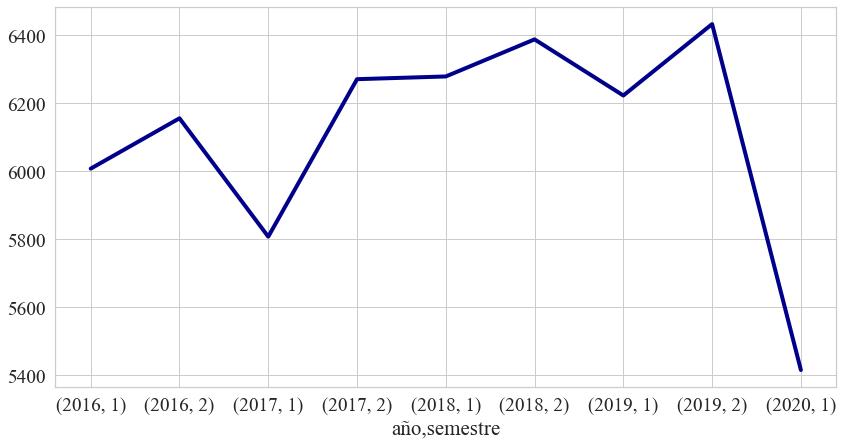

In [24]:
homicidios_by_year_semester_count.plot(color='darkblue', linewidth=4);

In [25]:
df_homicidios=homicidios_by_year_semester_count.to_frame()
df_homicidios

CANTIDAD
año  semestre          
2016 1           6008.0
     2           6156.0
2017 1           5808.0
     2           6271.0
2018 1           6279.0
     2           6388.0
2019 1           6223.0
     2           6433.0
2020 1           5416.0

In [26]:
df_lideres=data_by_year_semester_count.to_frame()
df_lideres

victima
año  semestre         
2016 1              39
     2              41
2017 1              51
     2              51
2018 1              73
     2              82
2019 1              60
     2              64
2020 1              95

In [27]:
df_temp=pd.merge(df_homicidios,df_lideres, how='outer',on = ['año', 'semestre'])
df_temp

CANTIDAD  victima
año  semestre                   
2016 1           6008.0       39
     2           6156.0       41
2017 1           5808.0       51
     2           6271.0       51
2018 1           6279.0       73
     2           6388.0       82
2019 1           6223.0       60
     2           6433.0       64
2020 1           5416.0       95

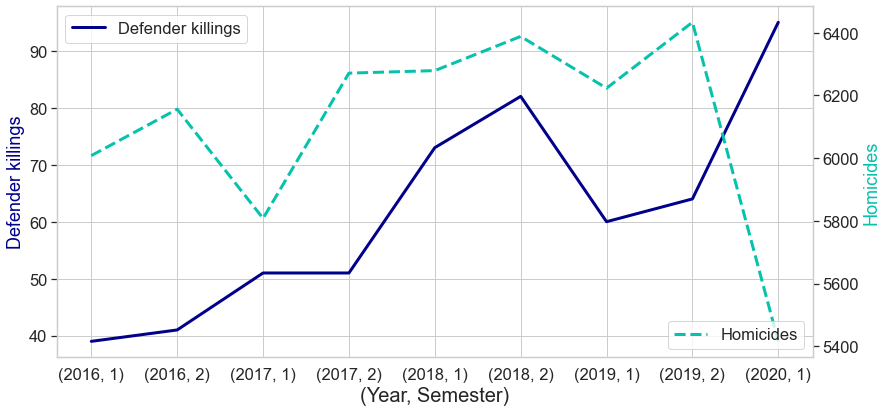

In [54]:

plt.rcParams["figure.figsize"] = [12.0, 6.0]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

df_temp.victima.plot(color='darkblue', ax=ax1, linewidth=3, label='Defender killings')
df_temp.CANTIDAD.plot(color='#06c2ac', ax=ax2, style='--', linewidth=3, label='Homicides')
ax1.legend()
ax2.legend(loc=4)
plt.grid()
plt.tight_layout()
ax1.set_xlabel("(Year, Semester)",fontsize = 20)
ax1.set_ylabel('Defender killings', color='darkblue')
ax2.set_ylabel('Homicides', color='#06c2ac')
plt.savefig(r'graficos\Number of  killings of human rights defenders vs homicides.jpg', bbox_inches='tight');



In [29]:
asesinatos_lideres=pd.read_csv('asesinatos lideres(datos)/asesinatos_lideres_departamento.csv')

In [30]:
homicidios_departamento=pd.read_csv('homicidios(datos)/tasa_homicidios_departamento.csv')

In [31]:
df=pd.merge(asesinatos_lideres,homicidios_departamento, how='outer',on = 'departamento')

In [32]:
df.set_index('departamento', inplace=True)

In [33]:
df = df[df["victimas"].notna()]

In [34]:
df.sort_values(by=['victimas'], inplace=True, ascending=False)

In [35]:
df.rename(columns={'victimas':'Defender killings (left)', 'tasa_de_homicidios':'Homicide rate'}, inplace=True)

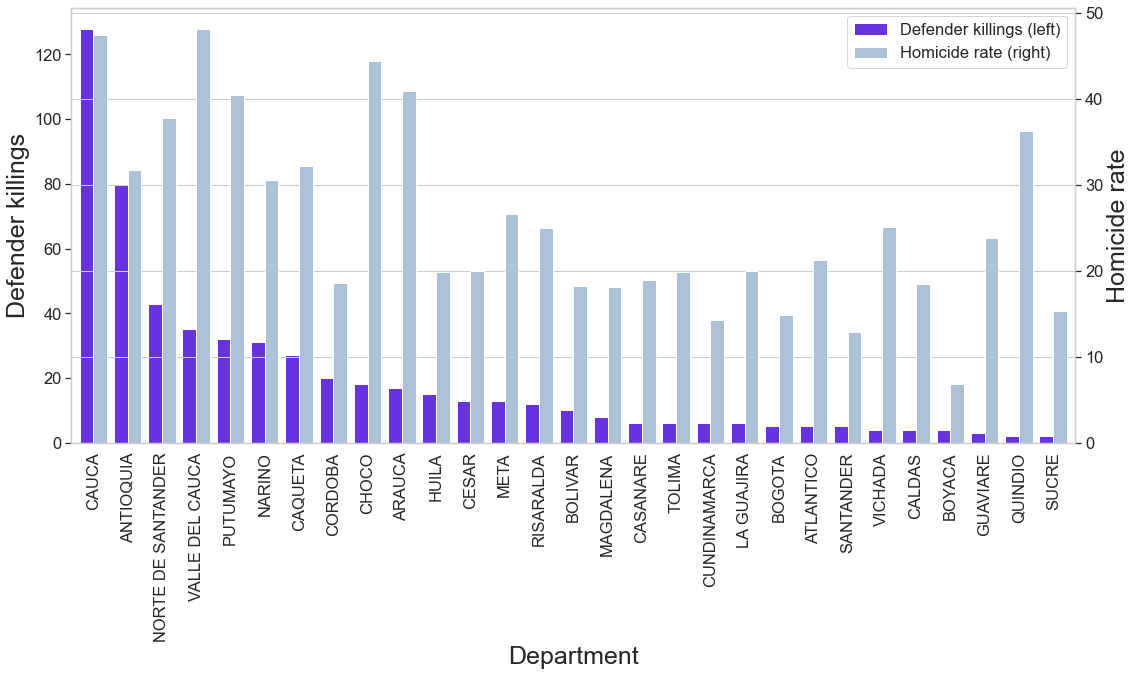

In [36]:
plt.rcParams["figure.figsize"] = [18.0, 8.0]
sns.set(font_scale=1.5,style="whitegrid")
plt.rcParams['font.size'] = 16
colors=['#6832e3','#acc2d9']
df.plot( kind= 'bar' , secondary_y= 'Homicide rate' ,rot=90, color=colors, width=0.8)

ax1, ax2 = plt.gcf().get_axes() 

ax1.set_ylabel('Defender killings',fontsize = 25)
ax2.set_ylabel('Homicide rate',fontsize = 25)
ax1.set_xlabel('Department',fontsize = 25)


plt.savefig('graficos\defenders_homicides.jpg', bbox_inches='tight');
plt.show()

In [37]:
data_by_defender_year_semester = df_final.groupby(['Tipo defensor','año', 'semestre']) # Agrupo por año y semestre

In [38]:
data_by_defender_year_semester_count = data_by_defender_year_semester['victima'].agg('count')

In [39]:
data_by_defender_year_semester_count.to_frame()

victima
Tipo defensor      año  semestre         
Afro               2016 1               5
                        2               2
                   2017 1               4
                        2               3
                   2018 1               2
...                                   ...
Youth or education 2017 2               3
                   2018 1               2
                        2               3
                   2019 2               1
                   2020 1               2

[82 rows x 1 columns]

In [40]:
type_defender_timeseries =data_by_defender_year_semester_count.unstack('Tipo defensor')


In [41]:
type_defender_timeseries

Tipo defensor  Afro  Communal  Community  Farmer or environmental  Indigenous  \
año  semestre                                                                   
2016 1          5.0       7.0        6.0                      6.0         8.0   
     2          2.0      13.0        4.0                      7.0         7.0   
2017 1          4.0      13.0       10.0                      7.0         5.0   
     2          3.0      14.0       10.0                      7.0         7.0   
2018 1          2.0      23.0       13.0                     14.0        13.0   
     2          3.0      37.0        9.0                     15.0        13.0   
2019 1          3.0      18.0       22.0                      8.0         6.0   
     2          2.0      15.0        6.0                     11.0        26.0   
2020 1          4.0      28.0       15.0                     24.0        18.0   

Tipo defensor  LGTBI  Other  Union  Victims  Women  Youth or education  
año  semestre                                                           
2016 1           2.0    1.0    2.0      1.0    NaN                 1.0  
     2           1.0    1.0    2.0      2.0    NaN                 2.0  
2017 1           3.0    2.0    3.0      1.0    1.0                 2.0  
     2           NaN    4.0    2.0      1.0    NaN                 3.0  
2018 1           1.0    NaN    3.0      2.0    NaN                 2.0  
     2           NaN    NaN    1.0      1.0    NaN                 3.0  
2019 1           1.0    NaN    1.0      1.0    NaN                 NaN  
     2           NaN    1.0    NaN      1.0    1.0                 1.0  
2020 1           1.0    NaN    3.0      NaN    NaN                 2.0

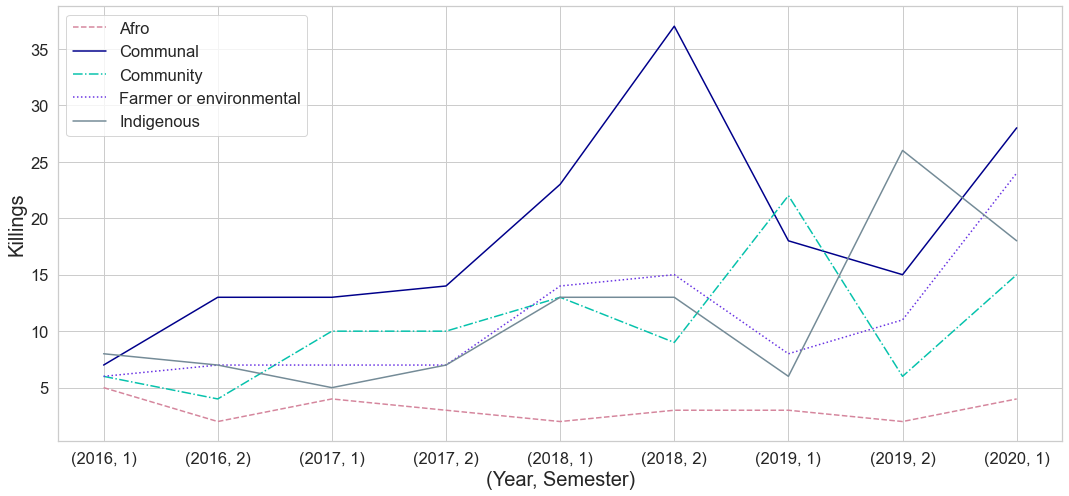

In [42]:
colors=[ '#d5869d','darkblue','#06c2ac','#6832e3', '#748b97']
type_defender_timeseries.iloc[:,:5].plot(color=colors, style=["--","-","-.",":", "-"])
plt.ylabel('Killings',fontsize = 20)
plt.xlabel("(Year, Semester)",fontsize = 20)
plt.legend()
plt.savefig(r'graficos\Number of  killings by type of defender.png');

In [43]:
data_by_day = df_final.groupby(['dia']) 

In [44]:
data_by_day_count = data_by_day['victima'].agg('count')

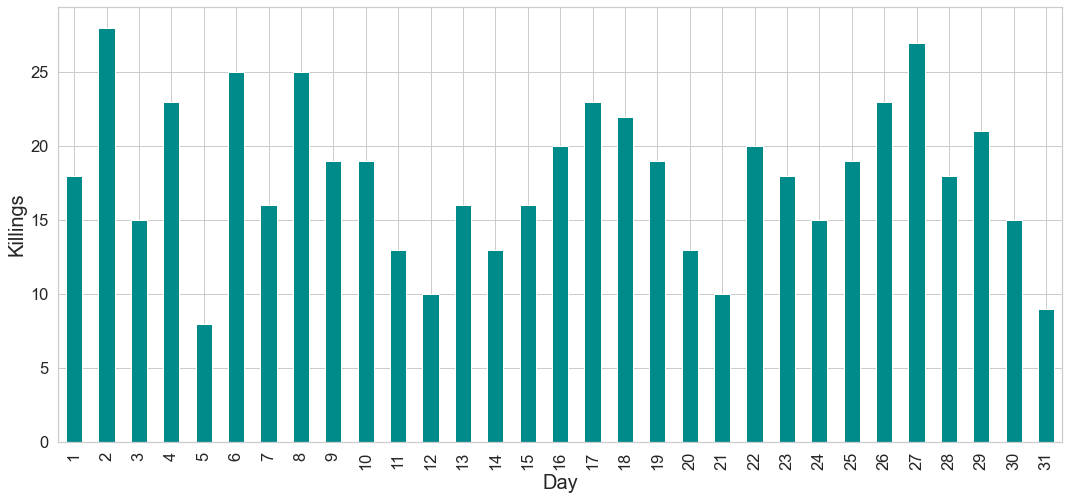

In [45]:
data_by_day_count.plot(kind='bar', color='darkcyan')
plt.ylabel('Killings',fontsize = 20)
plt.xlabel("Day",fontsize = 20)
plt.savefig(r'graficos\Number of  killings by day.png');

In [46]:
df_final['day_week'] = df_final['fecha'].dt.day_name()

In [47]:
data_by_day_week = df_final.groupby(['day_week'])

In [48]:
data_by_day_week_count = data_by_day_week['victima'].agg('count')

In [49]:
data_by_day_week_count

day_week
Friday        79
Monday        74
Saturday      70
Sunday       101
Thursday      89
Tuesday       81
Wednesday     62
Name: victima, dtype: int64

In [50]:
day_week_df=data_by_day_week_count.to_frame()

In [51]:
day_week_df.sort_values(by=['victima'], inplace=True, ascending=False)

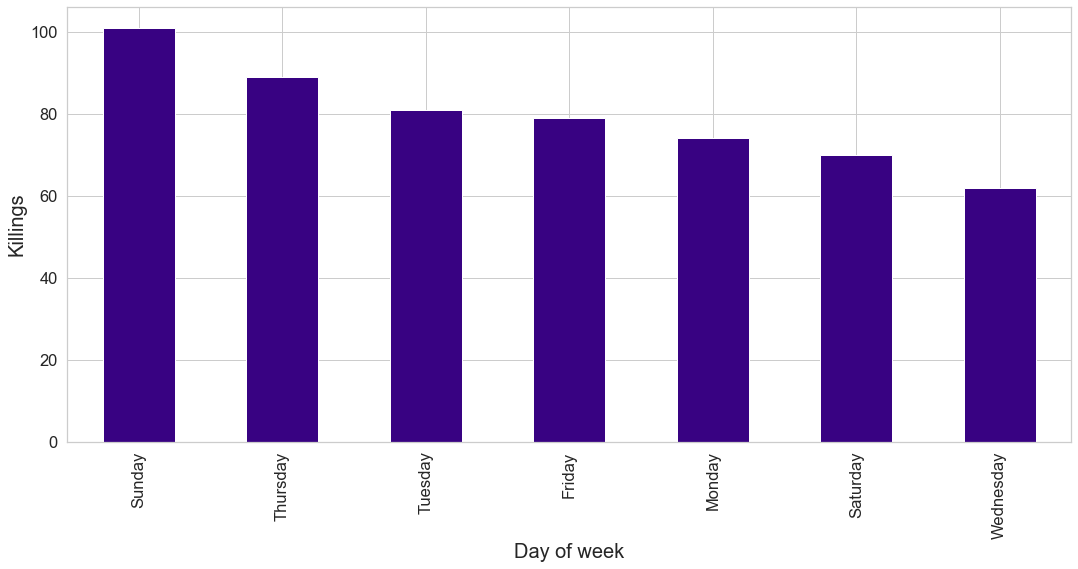

In [52]:
day_week_df.plot(kind='bar', color='#380282')
plt.gca().get_legend().remove()
plt.ylabel('Killings',fontsize = 20)
plt.xlabel("Day of week",fontsize = 20)
plt.savefig(r'graficos\Number of  killings by day of week.png');